In [2]:
from sn_solver import run

In [3]:
# N is 1000 by default
xs, mus, weights2, phi2 = run('example_input.json', S=2)
_, _, weights4, phi4 = run('example_input.json', S=4)
_, _, weights8, phi8 = run('example_input.json', S=8)
_, _, weights16, phi16 = run('example_input.json', S=16)
_, _, weights32, phi32 = run('example_input.json', S=32)

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [9]:
p2 = np.sum(phi2.T * weights2, axis=1)
p4 = np.sum(phi4.T * weights4, axis=1)
p8 = np.sum(phi8.T * weights8, axis=1)
p16 = np.sum(phi16.T * weights16, axis=1)
p32 = np.sum(phi32.T * weights32, axis=1)

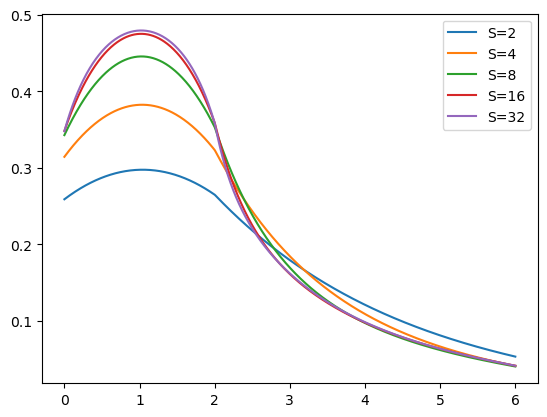

In [10]:
plt.plot(xs, p2, label='S=2')
plt.plot(xs, p4, label='S=4')
plt.plot(xs, p8, label='S=8')
plt.plot(xs, p16, label='S=16')
plt.plot(xs, p32, label='S=32')
plt.legend()

$S=16$ or $S=32$ seem to suffice.

In [43]:
xs2, mus, weights2, phi2 = run('example_input.json', N = 100, S=2)
xs3, _, weights3, phi3 = run('example_input.json', N = 1000, S=2)
xs4, _, weights4, phi4 = run('example_input.json', N = 10000, S=2)

In [44]:
xs5, _, weights5, phi5 = run('example_input.json', N = 100000, S=2)

In [45]:
xs6, _, weights6, phi6 = run('example_input.json', N = 1000000, S=2)

In [46]:
p2 = np.sum(phi2.T * weights2, axis=1)
p3 = np.sum(phi3.T * weights3, axis=1)
p4 = np.sum(phi4.T * weights4, axis=1)
p5 = np.sum(phi5.T * weights5, axis=1)
p6 = np.sum(phi6.T * weights6, axis=1)

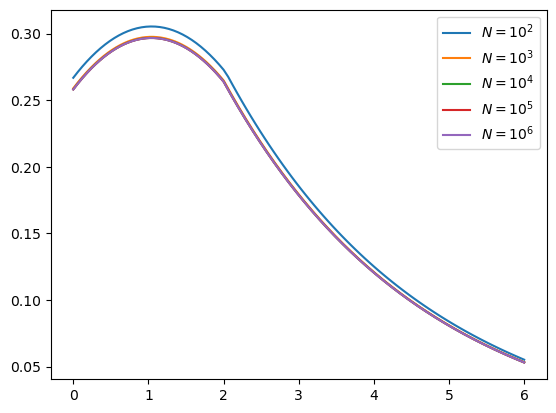

In [49]:
plt.plot(xs2, p2, label=r'$N=10^2$')
plt.plot(xs3, p3, label=r'$N=10^3$')
plt.plot(xs4, p4, label=r'$N=10^4$')
plt.plot(xs5, p5, label=r'$N=10^5$')
plt.plot(xs6, p6, label=r'$N=10^6$')
plt.legend()

Let's assume $N=10^6$ is our "true" solution

The rate of convergence is then calculated as such

In [53]:
ys = [np.max(p) - np.max(p6) for p in [p2,p3,p4,p5]]
xs = [10**2, 10**3, 10**4, 10**5]

In [56]:
ys[1]/ys[0]

0.09945733155186033

In [57]:
ys[2]/ys[1]

0.0990726882734427

In [58]:
ys[3]/ys[2]

0.09090752718519166

So we have a linear rate of convergence of 0.1

A loglog plot confurms that we have a linear rate of spatial convergence

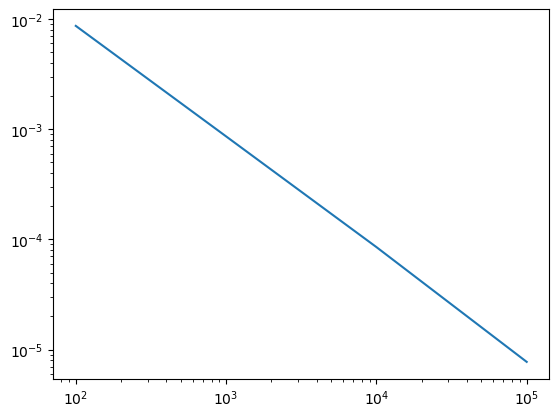

In [69]:
plt.loglog(xs,ys)